# 2


In [1]:
from load_datasets import (
    train_val_generator,
    val_generator,
    train_generator,
    test_generator,
    X_train,
    X_val,
)
from helper_functions import flatten_list, plot_and_print_model_metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
def model_cnn_2_classes(
    convolution_layers=[],
    mlp_layers=[],
    *,
    flatten_layer=[Flatten(name="flatten_layer")],
    name: str = "cnn_model_2_classes",
    optimizer=Adam(learning_rate=0.001),
    metrics=["acc"],
):
    model = Sequential(
        convolution_layers
        + flatten_layer
        + mlp_layers
        + [Dense(1, activation="sigmoid", name="output_layer")],
        name=name,
    )
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=metrics)
    model.summary()
    return model

In [3]:
X_train.shape[1:]

(32, 32, 3)

In [11]:
input_shape = X_train.shape[1:]
model_1__kernel_numbers = [32, 64, 128, 128]
model_1__cnn_layers = flatten_list([
    [
        Conv2D(
            kernel_number,
            padding="same",
            kernel_size=(3, 3),
            activation="relu",
            kernel_initializer="he_normal",
            input_shape=(32, 32, 3),
        ),
        MaxPooling2D(pool_size=(2, 2), strides=2),
    ]
    for kernel_number in model_1__kernel_numbers
])
model_1__mlp_layers = [Dropout(.3), Dense(512, activation='relu', kernel_initializer='he_normal')]
model_1__cnn_layers, model_1__mlp_layers

([<keras.layers.convolutional.Conv2D at 0x1ec8ee9ce50>,
  <keras.layers.core.dense.Dense at 0x1ef1c142cd0>])

In [12]:
model_1 = model_cnn_2_classes(model_1__cnn_layers, model_1__mlp_layers, name="model_1")

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 4, 4, 128)        0   

In [6]:
int(len(X_train) / 32), int(len(X_val) / 32)

(50, 12)

Epoch 1/100
50/50 [==============================] - 1s 18ms/step - loss: 0.8127 - acc: 0.5081 - val_loss: 0.7350 - val_acc: 0.0000e+00
Epoch 2/100
50/50 [==============================] - 1s 16ms/step - loss: 0.6931 - acc: 0.5025 - val_loss: 0.7170 - val_acc: 0.0312
Epoch 3/100
50/50 [==============================] - 1s 15ms/step - loss: 0.6939 - acc: 0.5044 - val_loss: 0.6948 - val_acc: 0.4948
Epoch 4/100
50/50 [==============================] - 1s 16ms/step - loss: 0.6862 - acc: 0.5581 - val_loss: 0.5244 - val_acc: 0.9557
Epoch 5/100
50/50 [==============================] - 1s 15ms/step - loss: 0.6753 - acc: 0.5813 - val_loss: 0.4946 - val_acc: 0.9115
Epoch 6/100
50/50 [==============================] - 1s 15ms/step - loss: 0.6919 - acc: 0.5231 - val_loss: 0.5997 - val_acc: 0.9349
Epoch 7/100
50/50 [==============================] - 1s 15ms/step - loss: 0.6694 - acc: 0.5894 - val_loss: 0.5522 - val_acc: 0.8438
Epoch 8/100
50/50 [==============================] - 1s 15ms/step - loss

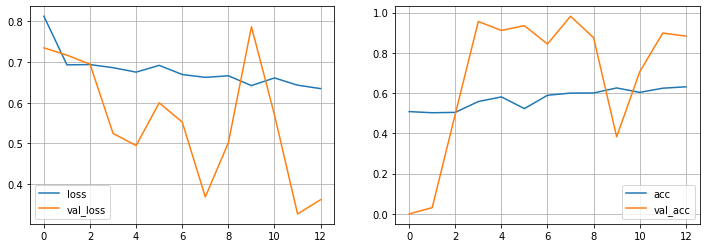

In [13]:
def fit_then_evaluate_model(
    model,
    *,
    steps_per_epoch=50,
    validation_steps=12,
    early_stopper=EarlyStopping(
        monitor="val_acc", mode="max", patience=5, restore_best_weights=True
    )
):
    model.fit(
        train_val_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=100,
        callbacks=[early_stopper],
        validation_data=val_generator,
        validation_steps=validation_steps,
    )
    plot_and_print_model_metrics(model)


fit_then_evaluate_model(model_1)

## b)


In [9]:
model_2__kernel_numbers = [32, 64, 128]
model_2__cnn_layers = flatten_list([
    [
        Conv2D(
            kernel_number,
            padding="same",
            kernel_size=(3, 3),
            activation="relu",
            kernel_initializer="he_normal",
            input_shape=(32, 32, 3),
        ),
        MaxPooling2D(pool_size=(2, 2), strides=2),
    ]
    for kernel_number in model_2__kernel_numbers
])
model_2__mlp_layers = [Dropout(.3), Dense(512, activation='relu', kernel_initializer='he_normal')]
model_2 = model_cnn_2_classes(model_2__cnn_layers, model_2__mlp_layers, name='model_2')

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 128)        0   

In [ ]:
fit_then_evaluate_model(model_2)

In [15]:
model_3__kernel_numbers = [32, 64, 128, 256]
model_3__cnn_layers = flatten_list([
    [
        Conv2D(
            kernel_number,
            padding="same",
            kernel_size=(3, 3),
            activation="relu",
            kernel_initializer="he_normal",
            input_shape=(32, 32, 3),
        ),
        MaxPooling2D(pool_size=(2, 2), strides=2),
    ]
    for kernel_number in model_3__kernel_numbers
])
model_3__mlp_layers = [Dropout(.3), Dense(512, activation='relu', kernel_initializer='he_normal')]
model_3 = model_cnn_2_classes(model_3__cnn_layers, model_3__mlp_layers, name='model_3')

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 4, 4, 128)        0   

Epoch 1/100
50/50 [==============================] - 2s 21ms/step - loss: 0.9937 - acc: 0.5006 - val_loss: 0.7859 - val_acc: 0.0000e+00
Epoch 2/100
50/50 [==============================] - 1s 16ms/step - loss: 0.6931 - acc: 0.4931 - val_loss: 0.7044 - val_acc: 0.2682
Epoch 3/100
50/50 [==============================] - 1s 16ms/step - loss: 0.6928 - acc: 0.5375 - val_loss: 0.6829 - val_acc: 0.8151
Epoch 4/100
50/50 [==============================] - 1s 16ms/step - loss: 0.6910 - acc: 0.5406 - val_loss: 0.7321 - val_acc: 0.4609
Epoch 5/100
50/50 [==============================] - 1s 16ms/step - loss: 0.6869 - acc: 0.5431 - val_loss: 0.6699 - val_acc: 0.8750
Epoch 6/100
50/50 [==============================] - 1s 15ms/step - loss: 0.6852 - acc: 0.5469 - val_loss: 0.6556 - val_acc: 0.8438
Epoch 7/100
50/50 [==============================] - 1s 15ms/step - loss: 0.6810 - acc: 0.5706 - val_loss: 0.6201 - val_acc: 0.9948
Epoch 8/100
50/50 [==============================] - 1s 16ms/step - loss

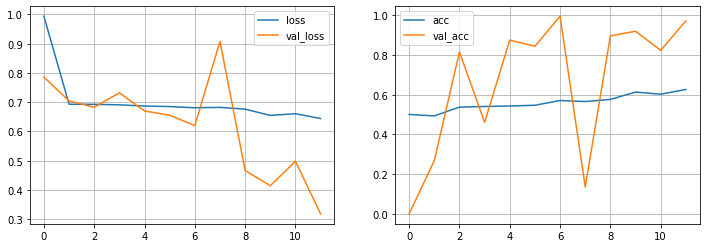

In [16]:
fit_then_evaluate_model(model_3)